# COVID-19 Vaccines Administered Worldwide
---
This is the first notebook in a series of notebooks that will primarily focus on Exploratory Data Analysis and creating a baseline model.

## Libraries

In [51]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import os, shutil
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_rows', 50)

Data downloaded from Our World in Data here: 

[Our World in Data Coronavirus Vaccine site](https://ourworldindata.org/covid-vaccinations)

In [2]:
owid_df = pd.read_csv('../data/owid-covid-data.csv')

In [3]:
owid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76411 entries, 0 to 76410
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               76411 non-null  object 
 1   continent                              72660 non-null  object 
 2   location                               76411 non-null  object 
 3   date                                   76411 non-null  object 
 4   total_cases                            75112 non-null  float64
 5   new_cases                              75110 non-null  float64
 6   new_cases_smoothed                     74109 non-null  float64
 7   total_deaths                           65813 non-null  float64
 8   new_deaths                             65971 non-null  float64
 9   new_deaths_smoothed                    74109 non-null  float64
 10  total_cases_per_million                74703 non-null  float64
 11  ne

In [4]:
owid_df.isna().sum()

iso_code                                     0
continent                                 3751
location                                     0
date                                         0
total_cases                               1299
new_cases                                 1301
new_cases_smoothed                        2302
total_deaths                             10598
new_deaths                               10440
new_deaths_smoothed                       2302
total_cases_per_million                   1708
new_cases_per_million                     1710
new_cases_smoothed_per_million            2706
total_deaths_per_million                 10994
new_deaths_per_million                   10836
new_deaths_smoothed_per_million           2706
reproduction_rate                        14749
icu_patients                             68481
icu_patients_per_million                 68481
hosp_patients                            66861
hosp_patients_per_million                66861
weekly_icu_ad

Column descriptions for this dataset

https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [5]:
owid_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
iso_code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG
continent,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09
total_cases,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,5.0,7.0
new_cases,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN,0.143,0.143,0.0,0.143,0.429,0.429,0.429,0.429,0.571,0.857
total_deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_deaths_smoothed,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
owid_df.values

array([['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ['AFG', 'Asia', 'Afghanistan', ..., 0.5, 64.83, 0.511],
       ...,
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571],
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571],
       ['ZWE', 'Africa', 'Zimbabwe', ..., 1.7, 61.49, 0.571]],
      dtype=object)

In [7]:
owid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,75112.0,6.794412e+05,4.760392e+06,1.000,7.447500e+02,8.437500e+03,9.063750e+04,1.232076e+08
new_cases,75110.0,5.222050e+03,3.246308e+04,-74347.000,2.000000e+00,6.100000e+01,6.860000e+02,8.809020e+05
new_cases_smoothed,74109.0,5.228126e+03,3.213172e+04,-6223.000,6.143000e+00,7.400000e+01,7.128570e+02,7.395644e+05
total_deaths,65813.0,1.990863e+04,1.167840e+05,1.000,3.900000e+01,2.610000e+02,2.496000e+03,2.715295e+06
new_deaths,65971.0,1.324322e+02,7.240436e+02,-1918.000,0.000000e+00,2.000000e+00,1.600000e+01,1.790300e+04
new_deaths_smoothed,74109.0,1.167888e+02,6.623443e+02,-232.143,0.000000e+00,1.000000e+00,1.242900e+01,1.443143e+04
total_cases_per_million,74703.0,8.101252e+03,1.587834e+04,0.001,1.575915e+02,1.122195e+03,7.586594e+03,1.490584e+05
new_cases_per_million,74701.0,6.812939e+01,1.700572e+02,-2153.437,1.460000e-01,6.605000e+00,5.888500e+01,8.652658e+03
new_cases_smoothed_per_million,73705.0,6.797458e+01,1.434214e+02,-276.825,1.031000e+00,8.753000e+00,6.616800e+01,2.648773e+03
total_deaths_per_million,65417.0,1.887367e+02,3.348314e+02,0.001,5.821000e+00,3.263700e+01,2.006170e+02,2.327774e+03


In [8]:
owid_df.nunique()

iso_code                                   215
continent                                    6
location                                   215
date                                       446
total_cases                              39765
new_cases                                10469
new_cases_smoothed                       19939
total_deaths                             15115
new_deaths                                2532
new_deaths_smoothed                       5652
total_cases_per_million                  57700
new_cases_per_million                    33070
new_cases_smoothed_per_million           37179
total_deaths_per_million                 35132
new_deaths_per_million                    6523
new_deaths_smoothed_per_million           7758
reproduction_rate                          355
icu_patients                              2054
icu_patients_per_million                  4365
hosp_patients                             4100
hosp_patients_per_million                 7154
weekly_icu_ad

In [9]:
from pandas_profiling import ProfileReport

In [10]:
profile = ProfileReport(owid_df, title="Pandas Profiling Report")

In [11]:
# profile

## Fully Vaccinated Data EDA

In [12]:
fully_vax_df = pd.read_csv('../data/people-fully-vaccinated-covid.csv')

In [13]:
fully_vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   3326 non-null   object
 1   Code                     2635 non-null   object
 2   Day                      3326 non-null   object
 3   people_fully_vaccinated  3326 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 104.1+ KB


In [14]:
fully_vax_df['Day'] = pd.to_datetime(fully_vax_df['Day'])

In [15]:
fully_vax_df.head()

,Entity,Code,Day,people_fully_vaccinated
0,Africa,NaN,2021-02-03,5
1,Africa,NaN,2021-02-04,5
2,Africa,NaN,2021-02-05,5
3,Africa,NaN,2021-02-06,1586
4,Africa,NaN,2021-02-08,3980


In [16]:
fully_vax_df.isnull().sum()

Entity                       0
Code                       691
Day                          0
people_fully_vaccinated      0
dtype: int64

In [17]:
fully_vax_ts = fully_vax_df.copy()

In [18]:
fully_vax_ts.set_index('Day', inplace= True)

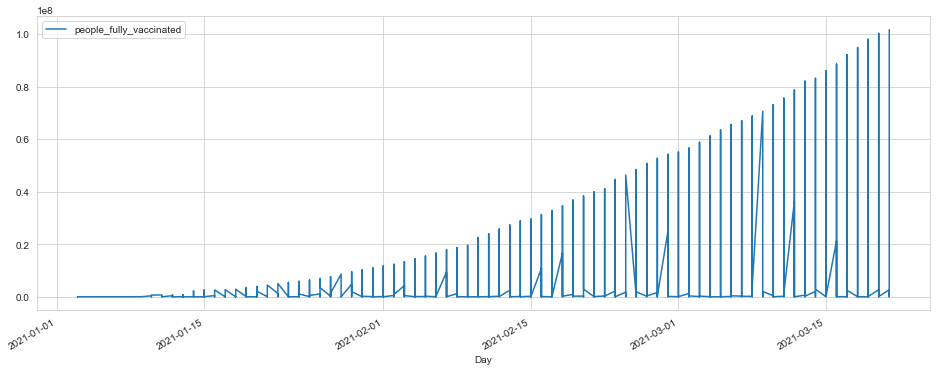

In [19]:
# quick time series plot
fully_vax_ts.plot(figsize= (16,6));

### Time Series plot of Fully Vaccinated People Worldwide

In [36]:
world_df = fully_vax_ts.where(fully_vax_ts['Entity'] == 'World')

In [37]:
world_df.dropna(inplace= True)

In [38]:
world_df.drop(['Code', 'Entity'], axis= 1, inplace= True)

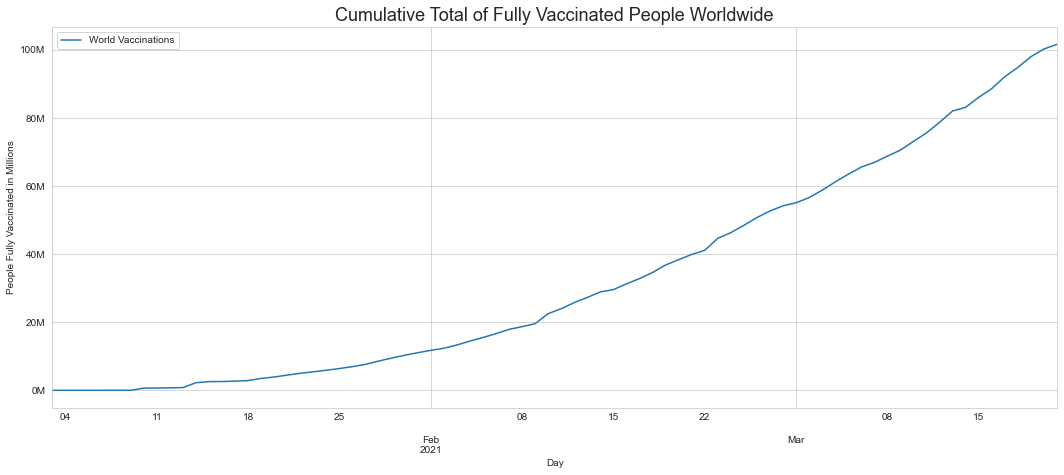

In [39]:
# Change format of y labels to millions
from matplotlib.ticker import FuncFormatter
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.fM' % (x * 1e-6)
formatter = FuncFormatter(thousands)

# plot World vaccinations
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
world_df.plot(figsize= (18, 7), ax= ax)
plt.legend(['World Vaccinations'], fancybox= True)
plt.title('Cumulative Total of Fully Vaccinated People Worldwide', fontsize= 18)
plt.ylabel('People Fully Vaccinated in Millions')
plt.show()

### Group Countries by their Income and Plot Fully Vaccinated People

Entity
Africa                  AxesSubplot(0.125,0.2;0.775x0.68)
Albania                 AxesSubplot(0.125,0.2;0.775x0.68)
Andorra                 AxesSubplot(0.125,0.2;0.775x0.68)
Argentina               AxesSubplot(0.125,0.2;0.775x0.68)
Asia                    AxesSubplot(0.125,0.2;0.775x0.68)
                                      ...                
United Arab Emirates    AxesSubplot(0.125,0.2;0.775x0.68)
United Kingdom          AxesSubplot(0.125,0.2;0.775x0.68)
United States           AxesSubplot(0.125,0.2;0.775x0.68)
Wales                   AxesSubplot(0.125,0.2;0.775x0.68)
World                   AxesSubplot(0.125,0.2;0.775x0.68)
Length: 89, dtype: object

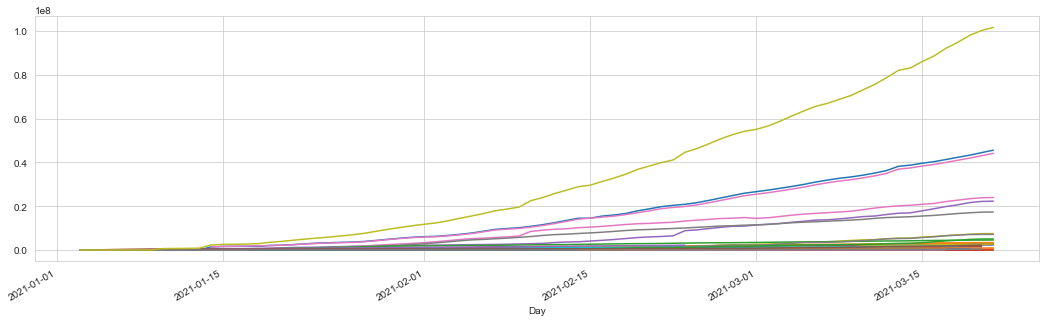

In [24]:
# plot fully vaccinated people in all countries
fig, ax = plt.subplots()
fully_vax_df.groupby('Entity').plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, legend= False, figsize= (18,5))

Not a very helpful plot. Not sure which country is which.

In [25]:
countries_df = fully_vax_df.copy()

In [26]:
countries_df.head()

,Entity,Code,Day,people_fully_vaccinated
0,Africa,NaN,2021-02-03,5
1,Africa,NaN,2021-02-04,5
2,Africa,NaN,2021-02-05,5
3,Africa,NaN,2021-02-06,1586
4,Africa,NaN,2021-02-08,3980


In [27]:
countries_df.sort_values(by= ['people_fully_vaccinated'], 
                         ascending= False, inplace= True)

In [28]:
# which countries do we have?
countries_df.Entity.unique()

array(['World', 'North America', 'United States', 'Europe', 'Asia',
       'European Union', 'India', 'South America', 'Turkey', 'Israel',
       'Brazil', 'Germany', 'Chile', 'Russia', 'Africa', 'Italy',
       'France', 'Morocco', 'Indonesia', 'United Kingdom',
       'United Arab Emirates', 'Spain', 'Poland', 'England', 'Serbia',
       'Romania', 'Mexico', 'Canada', 'Argentina', 'Netherlands',
       'Hungary', 'Greece', 'Portugal', 'Belgium', 'Switzerland',
       'Sweden', 'Czechia', 'Wales', 'Austria', 'Denmark', 'Norway',
       'Singapore', 'Slovakia', 'Bahrain', 'Scotland', 'Peru',
       'South Africa', 'Ireland', 'Lithuania', 'Slovenia', 'Finland',
       'Northern Ireland', 'Croatia', 'Bulgaria', 'Jordan', 'Costa Rica',
       'Estonia', 'Colombia', 'Lebanon', 'Malta', 'Kuwait', 'Cyprus',
       'Seychelles', 'Japan', 'Gibraltar', 'Ecuador', 'Kazakhstan',
       'Oman', 'Latvia', 'Bolivia', 'Luxembourg', 'Iceland',
       'Cayman Islands', 'Bermuda', 'Isle of Man', 'Belaru

Not everything in here is a country. Some are continents, there is also the European Union and "World". Let's remove those and get just the countries.

In [29]:
continents = ['North America', 'Europe', 'Asia','European Union', 
              'Africa', 'South America', 'England', 'World']

In [30]:
countries_df = countries_df[~countries_df['Entity'].isin(continents)]

In [31]:
countries_df.Entity.unique()

array(['United States', 'India', 'Turkey', 'Israel', 'Brazil', 'Germany',
       'Chile', 'Russia', 'Italy', 'France', 'Morocco', 'Indonesia',
       'United Kingdom', 'United Arab Emirates', 'Spain', 'Poland',
       'Serbia', 'Romania', 'Mexico', 'Canada', 'Argentina',
       'Netherlands', 'Hungary', 'Greece', 'Portugal', 'Belgium',
       'Switzerland', 'Sweden', 'Czechia', 'Wales', 'Austria', 'Denmark',
       'Norway', 'Singapore', 'Slovakia', 'Bahrain', 'Scotland', 'Peru',
       'South Africa', 'Ireland', 'Lithuania', 'Slovenia', 'Finland',
       'Northern Ireland', 'Croatia', 'Bulgaria', 'Jordan', 'Costa Rica',
       'Estonia', 'Colombia', 'Lebanon', 'Malta', 'Kuwait', 'Cyprus',
       'Seychelles', 'Japan', 'Gibraltar', 'Ecuador', 'Kazakhstan',
       'Oman', 'Latvia', 'Bolivia', 'Luxembourg', 'Iceland',
       'Cayman Islands', 'Bermuda', 'Isle of Man', 'Belarus', 'Monaco',
       'Guernsey', 'Jersey', 'Faeroe Islands', 'Andorra', 'Greenland',
       'Equatorial Guinea', '

In [32]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 3178 to 3042
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entity                   2768 non-null   object        
 1   Code                     2557 non-null   object        
 2   Day                      2768 non-null   datetime64[ns]
 3   people_fully_vaccinated  2768 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 108.1+ KB


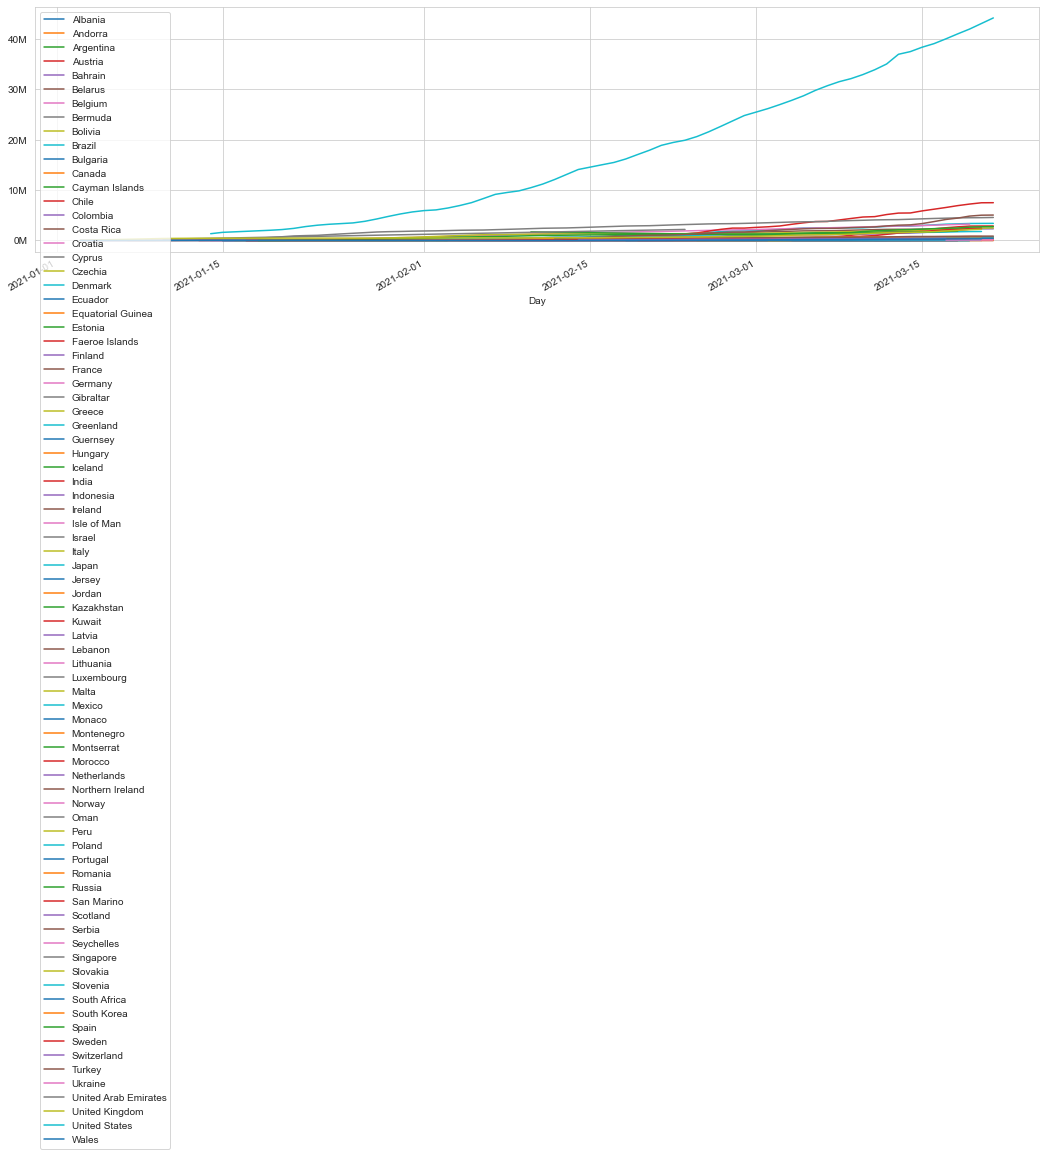

In [43]:
# Change format of y labels to millions
from matplotlib.ticker import FuncFormatter
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.fM' % (x * 1e-6)
formatter = FuncFormatter(thousands)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
for country, group in countries_df.groupby('Entity'):
    group.plot(x= 'Day', y= 'people_fully_vaccinated', ax= ax, figsize= (18,5), label= country)

Still not great. While we can now see the labels, it still is not very clear because there are too many countries. A way to segment them easily that could be useful later would be grouping them by their respective incomes.

To do this, we will need to know which category they are in, provided by the World Health Organization.

In [45]:
# open file from WHO that contains data on income classifications
country_incomes = pd.read_csv('../data/list-of-economies.csv', 
                              header= 4, index_col= False)
country_incomes

,Unnamed: 0,Economy,Code,Region,Income group,Lending category,Other
0,1.0,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
1,2.0,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
2,3.0,Algeria,DZA,Middle East & North Africa,Lower middle income,IBRD,NaN
3,4.0,American Samoa,ASM,East Asia & Pacific,Upper middle income,..,NaN
4,5.0,Andorra,AND,Europe & Central Asia,High income,..,NaN
...,...,...,...,...,...,...,...
261,42.0,Sub-Saharan Africa,SSF,NaN,NaN,NaN,NaN
262,43.0,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN,NaN
263,44.0,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN,NaN
264,45.0,Upper middle income,UMC,NaN,NaN,NaN,NaN


In [46]:
# check names of columns
country_incomes.columns

Index(['Unnamed: 0', 'Economy', 'Code', 'Region', 'Income group',
       'Lending category', 'Other'],
      dtype='object')

In [47]:
# check null / NaN values
country_incomes.isna().sum()

Unnamed: 0            2
Economy               2
Code                  2
Region               48
Income group         48
Lending category     48
Other               208
dtype: int64

In [48]:
# drop unnecessary / mostly empty columns
country_incomes.drop(columns= ['Unnamed: 0', 'Other'], inplace= True)
country_incomes

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,South Asia,Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,Middle East & North Africa,Lower middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,..
4,Andorra,AND,Europe & Central Asia,High income,..
...,...,...,...,...,...
261,Sub-Saharan Africa,SSF,NaN,NaN,NaN
262,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN
263,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN
264,Upper middle income,UMC,NaN,NaN,NaN


Bottom of DataFrame seems to be something different than the top of the DataFrame. Let's take a look. Again, all we want to see are the country names.

In [53]:
# see some of the last rows
country_incomes.Economy[210:250]

210                                              Vanuatu
211                                        Venezuela, RB
212                                              Vietnam
213                                Virgin Islands (U.S.)
214                                   West Bank and Gaza
215                                          Yemen, Rep.
216                                               Zambia
217                                             Zimbabwe
218                                                  NaN
219                                                  NaN
220                                           Arab World
221                               Caribbean small states
222                       Central Europe and the Baltics
223                           Early-demographic dividend
224                                  East Asia & Pacific
225          East Asia & Pacific (excluding high income)
226                     East Asia & Pacific (IDA & IBRD)
227                            

It looks like after the last countries there is another table that we do not need. We can remove all of that and only keep the countries and their data.

In [55]:
# subset data and check it worked
country_incomes = country_incomes.iloc[:218]
country_incomes.tail()

,Economy,Code,Region,Income group,Lending category
213,Virgin Islands (U.S.),VIR,Latin America & Caribbean,High income,..
214,West Bank and Gaza,PSE,Middle East & North Africa,Lower middle income,..
215,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,IDA
216,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,IDA
217,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend


In [ ]:
# merge dataframes and segment

In [ ]:
# plot vaccinations by income group

# Notes / Excess:

In [35]:
# create error here so nothing below this runs
asdfasdfffff

NameError: name 'asdfasdfffff' is not defined

In [ ]:
fully_vax_df.plot(kind= 'kde', figsize= (16,6));

In [ ]:
# country_groups = fully_vax_df.groupby('Entity')
country_groups = fully_vax_df.copy()

In [ ]:
country_groups.drop(['Code'], axis= 1, inplace= True)

In [ ]:
country_groups = country_groups.groupby(pd.Grouper(freq = 'D'))

In [ ]:
country_groups.head()

In [ ]:
temp_day = pd.DataFrame()
for dy, country in country_groups:
    temp_day[dy.day] = country.values.ravel()
    
temp_day.plot(figsize= (22,15), subplots= False, legend= True)

In [ ]:
country_groups2 = country_groups.copy()

In [ ]:
country_groups2.cumsum()
plt.figure()
country_groups2.plot()

In [ ]:
country_groups2